# Calibrating the Wattmeter

The gain and offset errors in the peak voltage reading results in a nonlinear power calibration curve. Here, we consider using an nth order polynomial calibration.

## Models

Let $V_m$ and $P_m$ be the measured peak input voltage and power dissipation for a given input. We may represent the calibrated or actual peak input by

$$ V_{pk} = V_0 + A V_m $$

where $V_0$ and $A$ are the total offset and gain errors, respectively. The corrected power dissipation is then

$$ P = \frac{V_{pk}^2}{2 R_{load}} = \frac{V_0^2}{2 R_{load}} + A V_0 \sqrt{\frac{2 P_m}{R_{load}}} + A^2 P_m $$

which is a nonlinear function of $P_m$. In addition, the power reading will need to be further corrected to account for variation in the load resistance $R_{load}$, however we'll ignore this in the analysis below.

## Example

Suppose $V_0 = 0.6 V$ and $A = 1.05 V/V$. The resulting measurement error is about 2.7W at full scale as shown below.

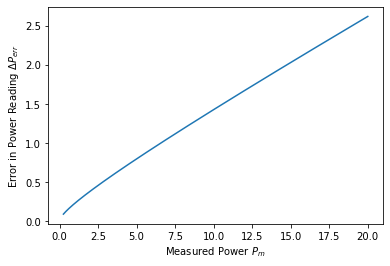

In [7]:
import numpy as np
import matplotlib.pyplot as plt

V0 = 0.6
A = 1.05
Rload = 50.0

PPm = np.linspace(0.25, 20, 1000)
PP = V0 ** 2 / 2 / Rload + A * V0 * np.sqrt(2 * PPm / Rload) + A ** 2 * PPm

plt.plot(PPm, np.abs(PP - PPm))
plt.xlabel('Measured Power $P_m$ (W)')
plt.ylabel('Error in Power Reading $\Delta P_{err}$ (W)')
plt.show()

Now consider applying a 2nd degree polynomial calibration curve to the data.

In [50]:
from numpy.polynomial import polynomial as P

coeffs = P.polyfit(PPm, PP * 10_000, 2)
print(coeffs)

[ 1.07303041e+03  1.13972451e+04 -7.46081341e+00]
